# Classifier mit den statistischen Lage und Streuungsparametern

**Inhalt:** \
- SMVC
- RandomForestRegressor
- KNNC
- Neuronales Netz \
Die Modelle wurden mit den statischen Lage- und Streuungsparameter erstellt.


In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
import pandas as pd
import matplotlib.pyplot as plt
from help_functions import loadAggData

# SMVC

Fitting 5 folds for each of 72 candidates, totalling 360 fits
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        60
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00        21
           4       1.00      0.96      0.98        28

    accuracy                           0.99       150
   macro avg       1.00      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150





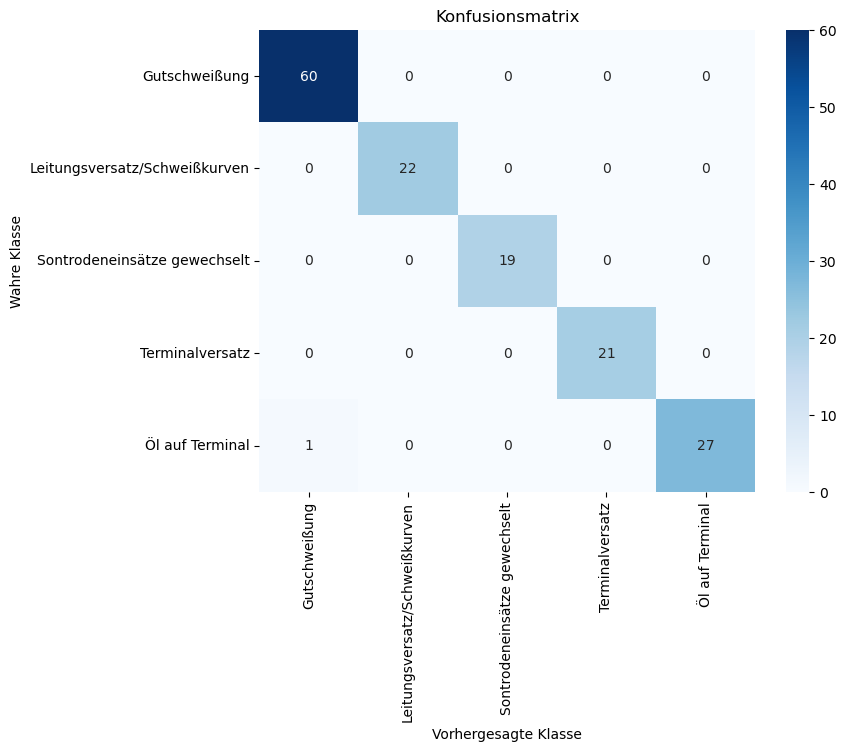

Beste Parameter: {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}


In [2]:
loadAggData = loadAggData()
filter_c = ["P_std", "F_max", "T_sum"]
x_train, x_test, y_train, y_test  = loadAggData.load_and_split_classification_data(filter_columns=filter_c, normalize=True)



param_grid = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    "degree": [2, 3, 4],
    "gamma": ["scale", "auto"],
}

svc = SVC()
grid_search = GridSearchCV(
    estimator=svc, param_grid=param_grid, cv=5, scoring="accuracy", verbose=1, n_jobs=-1
)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)
loadAggData.confusionmatrix(y_test, y_pred)
print("Beste Parameter:", best_params)


# RandomForestClassifier

In [3]:
from help_functions import loadAggData
loadAggData = loadAggData()

x_train, x_test, y_train, y_test  = loadAggData.load_and_split_classification_data(filter_columns=None, normalize=False)
rf = RandomForestClassifier(random_state=42)

rf.fit(x_train, y_train)

feature_importances = pd.DataFrame(
    {
        "Feature": [
            "P_mean",
            "F_mean",
            "D_mean",
            "T_mean",
            "P_med",
            "F_med",
            "D_med",
            "T_med",
            "P_std",
            "F_std",
            "D_std",
            "T_std",
            "P_max",
            "F_max",
            "D_max",
            "T_max",
            "T_sum",
        ],
        "Importance": rf.feature_importances_,
    }
).sort_values(by="Importance", ascending=False)

print(feature_importances)

   Feature  Importance
8    P_std    0.118003
0   P_mean    0.094116
16   T_sum    0.082430
15   T_max    0.071818
3   T_mean    0.068783
11   T_std    0.067410
4    P_med    0.064201
13   F_max    0.053435
1   F_mean    0.051606
7    T_med    0.046100
2   D_mean    0.045484
6    D_med    0.044053
12   P_max    0.043260
5    F_med    0.040033
9    F_std    0.039802
14   D_max    0.038380
10   D_std    0.031086


Fitting 5 folds for each of 162 candidates, totalling 810 fits


/home/david/miniconda3/envs/BIAFO/lib/python3.10/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


              precision    recall  f1-score   support

           0       0.98      1.00      0.99        60
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00        21
           4       1.00      0.96      0.98        28

    accuracy                           0.99       150
   macro avg       1.00      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150





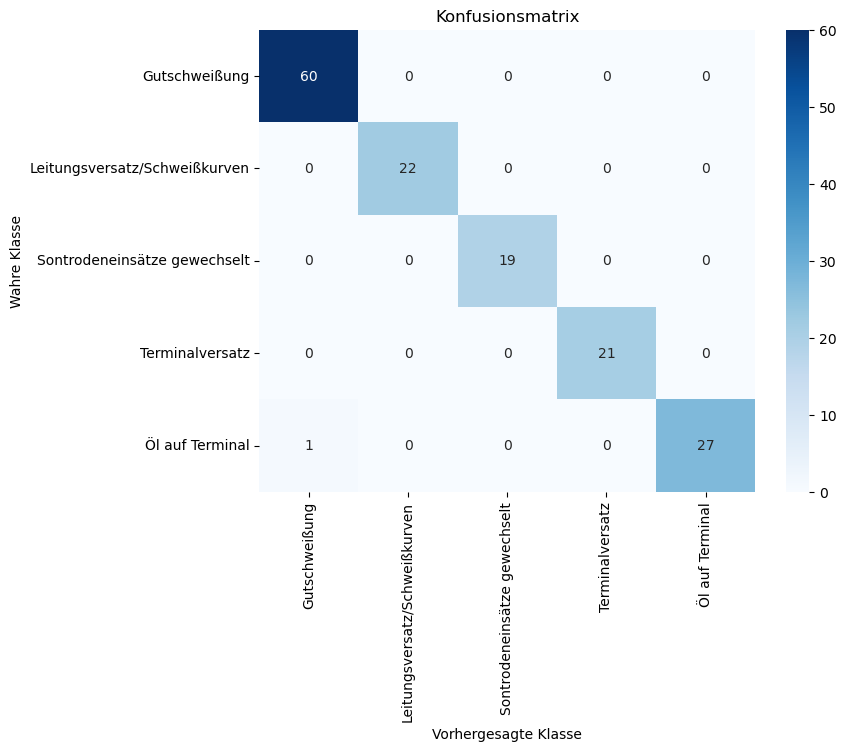

Beste Parameter: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


In [4]:
from help_functions import loadAggData
loadAggData = loadAggData()
filter_c = ["P_std", "F_max", "T_sum"]
x_train, x_test, y_train, y_test  = loadAggData.load_and_split_classification_data(filter_columns=filter_c, normalize=False)


param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False],
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(
    estimator=rf, param_grid=param_grid, cv=5, scoring="accuracy", verbose=1, n_jobs=-1
)

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)
loadAggData.confusionmatrix(y_test, y_pred)
print("Beste Parameter:", best_params)


# KNeighborsClassifier

Fitting 5 folds for each of 16 candidates, totalling 80 fits
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        60
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00        21
           4       1.00      0.96      0.98        28

    accuracy                           0.99       150
   macro avg       1.00      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150





/home/david/miniconda3/envs/BIAFO/lib/python3.10/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


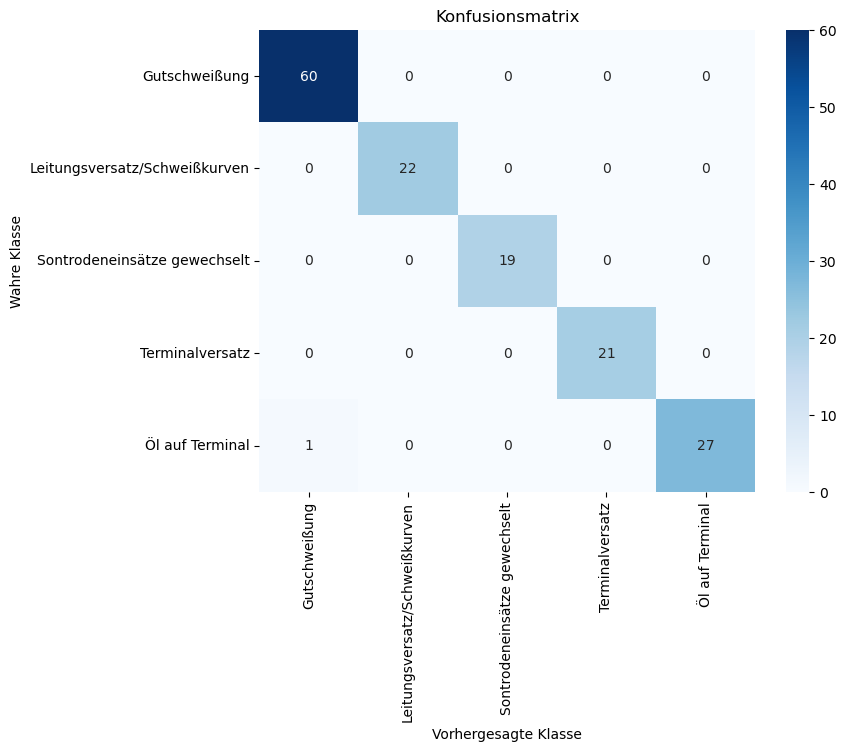

Beste Parameter: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}


In [5]:
from help_functions import loadAggData
loadAggData = loadAggData()
filter_c = ["P_std", "F_max", "T_sum"]
x_train, x_test, y_train, y_test  = loadAggData.load_and_split_classification_data(filter_columns=filter_c, normalize=True)

param_grid = {
    "n_neighbors": [3, 5, 7, 9],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan"]
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(
    estimator=knn, param_grid=param_grid, cv=5, scoring="accuracy", verbose=1, n_jobs=-1
)

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)
loadAggData.confusionmatrix(y_test, y_pred)
print("Beste Parameter:", best_params)


# Neuronale Netze

Fitting 5 folds for each of 16 candidates, totalling 80 fits


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        28

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150





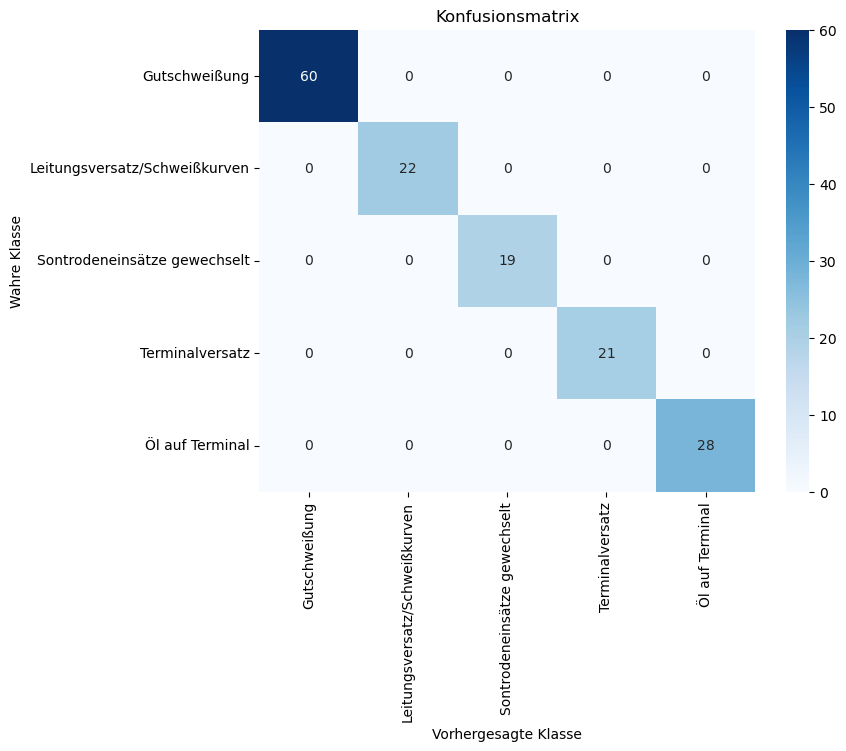

Beste Parameter: {'batch_size': 16, 'epochs': 50, 'model__dropout_rate': 0.5, 'model__neurons': 128, 'model__optimizer': 'adam'}
Test-Genauigkeit: 1.0


In [10]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"

from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score
from help_functions import loadAggData
loadAggData = loadAggData()
filter_c = ["P_std", "F_max", "T_sum"]
x_train, x_test, y_train, y_test  = loadAggData.load_and_split_classification_data(filter_columns=filter_c, normalize=True)

# Modell-Erstellungsfunktion
def create_model(optimizer="adam", dropout_rate=0.0, neurons=64):
    model = Sequential()
    model.add(Dense(neurons, activation="relu", input_shape=(x_train.shape[1],)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons // 2, activation="relu"))
    model.add(Dropout(dropout_rate))
    model.add(Dense(len(set(y_train)), activation="softmax"))
    model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

# Scikeras-Wrapper für KerasClassifier
model = KerasClassifier(model=create_model, verbose=0, validation_split=0.2)

# Parameter-Raster für GridSearch
param_grid = {
    "batch_size": [16, 32],
    "epochs": [50],
    "model__optimizer": ["adam", "rmsprop"],
    "model__dropout_rate": [0.2, 0.5],
    "model__neurons": [64, 128],
}

# EarlyStopping-Callback
early_stopping = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

# GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    verbose=1,
    n_jobs=-1,
    scoring="accuracy"
)

# Modelltraining mit EarlyStopping
grid_search.fit(x_train, y_train, callbacks=[early_stopping])

# Beste Parameter und Modell
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Vorhersagen auf Testdaten
y_pred = best_model.predict(x_test)

# Ergebnisse anzeigen
loadAggData.confusionmatrix(y_test, y_pred)
print("Beste Parameter:", best_params)
print("Test-Genauigkeit:", accuracy_score(y_test, y_pred))


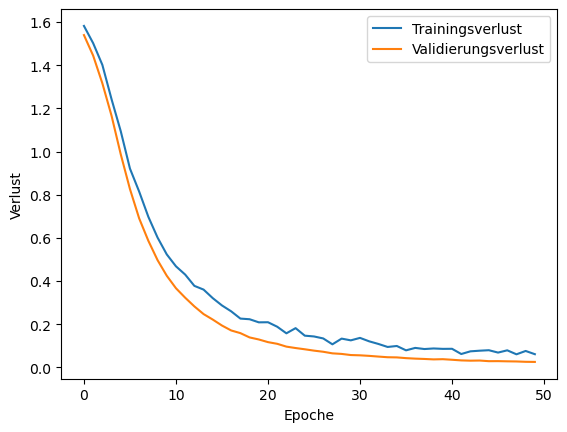

In [7]:
history = grid_search.best_estimator_.history_
plt.plot(history['loss'], label='Trainingsverlust')
plt.plot(history['val_loss'], label='Validierungsverlust')
plt.xlabel('Epoche')
plt.ylabel('Verlust')
plt.legend()
plt.show()

**Gesamter DataFrame**

Fitting 5 folds for each of 16 candidates, totalling 80 fits


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        28

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150





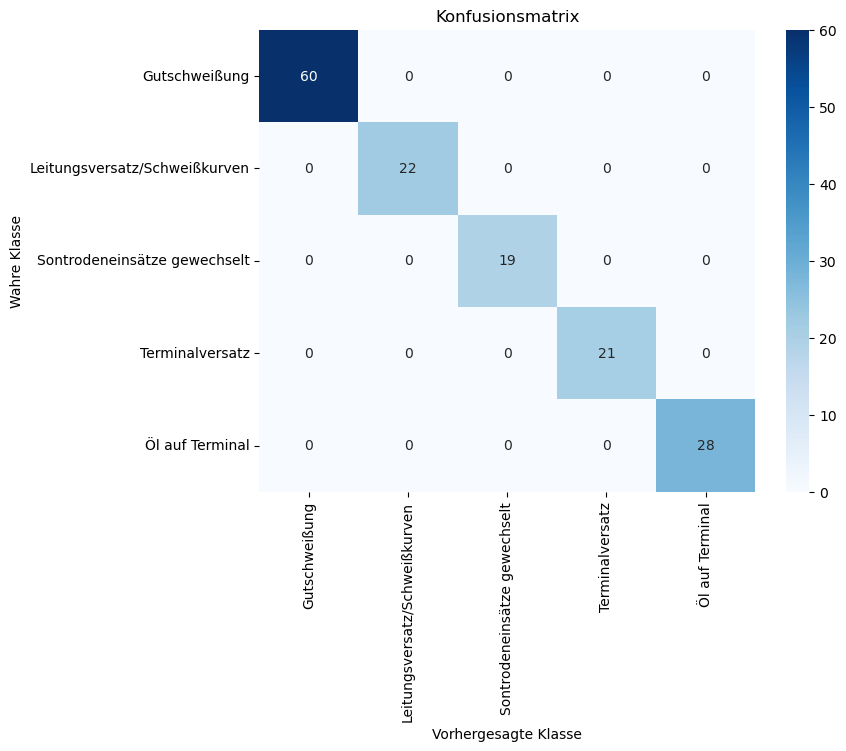

Beste Parameter: {'batch_size': 16, 'epochs': 50, 'model__dropout_rate': 0.5, 'model__neurons': 64, 'model__optimizer': 'adam'}
Test-Genauigkeit: 1.0


In [8]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
from help_functions import loadAggData
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.optimizers import Adam

from help_functions import loadAggData
loadAggData = loadAggData()
filter_c = ["P_std", "F_max", "T_sum"]
x_train, x_test, y_train, y_test  = loadAggData.load_and_split_classification_data(filter_columns=None, normalize=True)

# Modell-Erstellungsfunktion
def create_model(optimizer="adam", dropout_rate=0.0, neurons=64):
    model = Sequential()
    model.add(Dense(neurons, activation="relu", input_shape=(x_train.shape[1],)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons // 2, activation="relu"))
    model.add(Dropout(dropout_rate))
    model.add(Dense(len(set(y_train)), activation="softmax"))
    model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

# Scikeras-Wrapper für KerasClassifier
model = KerasClassifier(model=create_model, verbose=0, validation_split=0.2)

# Parameter-Raster für GridSearch
param_grid = {
    "batch_size": [16, 32],
    "epochs": [50],
    "model__optimizer": ["adam", "rmsprop"],
    "model__dropout_rate": [0.2, 0.5],
    "model__neurons": [64, 128],
}

# EarlyStopping-Callback
early_stopping = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

# GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    verbose=1,
    n_jobs=-1,
    scoring="accuracy"
)

# Modelltraining mit EarlyStopping
grid_search.fit(x_train, y_train, callbacks=[early_stopping])

# Beste Parameter und Modell
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Vorhersagen auf Testdaten
y_pred = best_model.predict(x_test)

# Ergebnisse anzeigen
loadAggData.confusionmatrix(y_test, y_pred)
print("Beste Parameter:", best_params)
print("Test-Genauigkeit:", accuracy_score(y_test, y_pred))


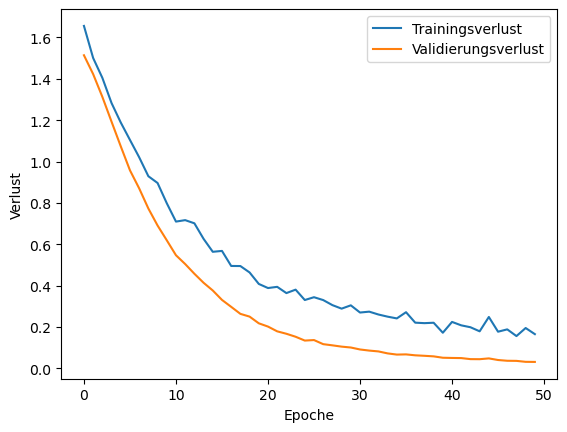

In [9]:

history = grid_search.best_estimator_.history_
plt.plot(history['loss'], label='Trainingsverlust')
plt.plot(history['val_loss'], label='Validierungsverlust')
plt.xlabel('Epoche')
plt.ylabel('Verlust')
plt.legend()
plt.show()